# Initial definitions

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import scipy.optimize
# Base directory = directory where this script lives
BASE_DIR = Path().resolve().parent
print(BASE_DIR)

/Users/hc682/Documents/AWEgas


# Plot a single realisation of the code 

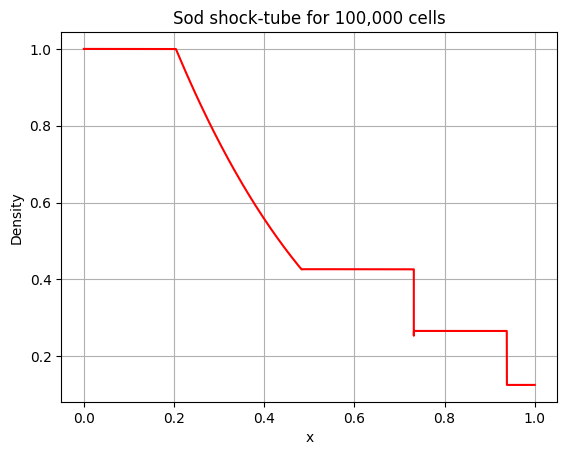

In [82]:
data_file = BASE_DIR / "realisations" / "100kcells.csv"
out_file = BASE_DIR / "img" / "plot100kcells.png"

# Read CSV file into DataFrame
df = pd.read_csv(data_file, header=None, names=["x", "Density"])
# Access as Series
x = df["x"]
y = df["Density"]


# Plot
plt.plot(x, y, linestyle="-", color="red")  # Red color for markers

plt.xlabel("x")
plt.ylabel("Density")
plt.title("Sod shock-tube for 100,000 cells")
plt.grid()
plt.savefig(out_file, dpi=375)
plt.show()

# Plot threads vs execution time and efficiency

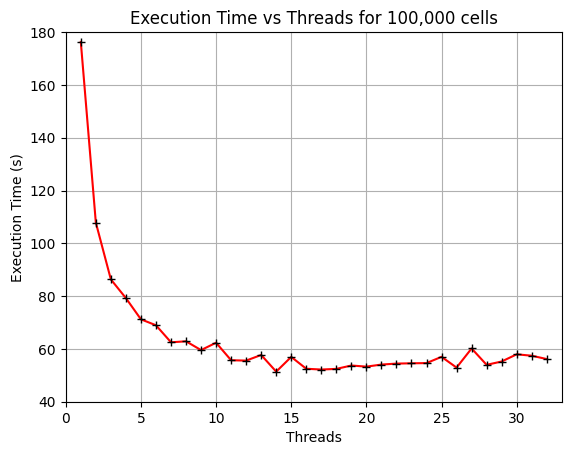

In [83]:
data_file = BASE_DIR / "var_thread" / "varthreads_100000_cells.csv"
out_file = BASE_DIR / "img" / "plot100kcellsvarthreads.png"

# Read CSV file into DataFrame
df = pd.read_csv(data_file)

# Assuming the CSV has columns named 'Threads' and 'ExecutionTime' (adjust accordingly)
xs = df['threads']
ys = df['execution_time_sec']

plt.plot(xs, ys, marker="+", linestyle="-", color="red",markeredgecolor="k")  # Red color for markers

# Set axis limits 
plt.xlim(0, 33)  # Change as needed
plt.ylim(40, 180)  # Change as needed

plt.xlabel("Threads")
plt.ylabel("Execution Time (s)")
plt.title("Execution Time vs Threads for 100,000 cells")
plt.grid(True)

# Save plot
plt.savefig(out_file, dpi=375)

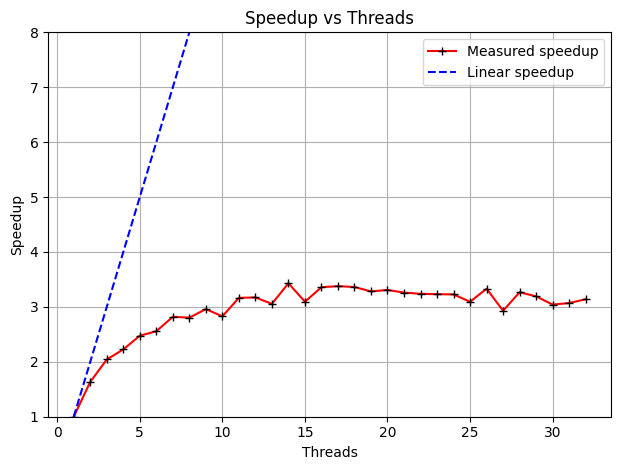

In [84]:

out_file = BASE_DIR / "img" / "plot100kcells_scaling.png"


# Serial time (1 thread)
T1 = df.loc[df['threads'] == 1, 'execution_time_sec'].iloc[0]
# Extract threads and execution times
threads = df['threads']
times = df['execution_time_sec']
# Compute speedup
df['speedup'] = T1 / times

# Plot speedup
plt.plot(df['threads'], df['speedup'],  marker="+", linestyle="-", color="red",markeredgecolor="k", label='Measured speedup')  # Red color for markers
plt.plot(df['threads'], df['threads'], linestyle='--', color='blue', label='Linear speedup')

plt.xlabel("Threads")
plt.ylabel("Speedup")
plt.title("Speedup vs Threads")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.ylim([1,8])
plt.savefig(out_file, dpi=375)
plt.show()

# Amdahl's Law

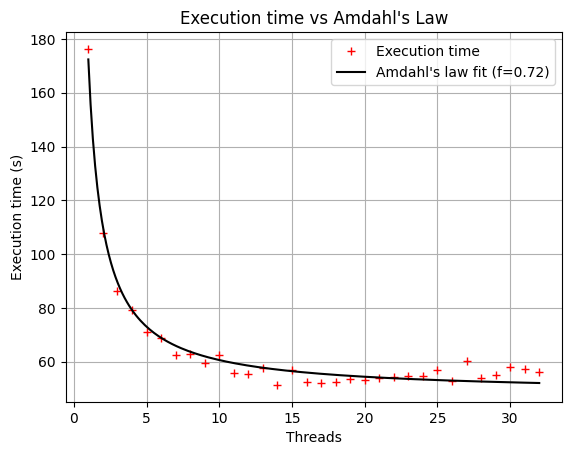

In [85]:
from scipy.optimize import curve_fit
import numpy as np

threads = df["threads"].to_numpy()
times = df["execution_time_sec"].to_numpy()

#Define Amdahl's law function
def amdahl(t, f, T1):
    """
    t: number of threads
    f: parallel fraction
    T1: serial execution time
    """
    return T1 * ((1 - f) + f / t)

# Fit curve to data
popt, pcov = curve_fit(amdahl, threads, times, bounds=([0, 0], [1, np.inf]))
f_fit, T1_fit = popt
t_smooth = np.linspace(1, max(threads), 200)
times_fit = amdahl(t_smooth, f_fit, T1_fit)

#Plot
plt.plot(threads, times, "r+", label="Execution time")
plt.plot(t_smooth, times_fit, "k-", label=f"Amdahl's law fit (f={f_fit:.2f})")
plt.xlabel("Threads")
plt.ylabel("Execution time (s)")
plt.title("Execution time vs Amdahl's Law")
plt.legend()
plt.grid(True)

out_file = BASE_DIR / "img" / "Amdahl.png"
plt.savefig(out_file, dpi=375)
plt.show()

# Weak scale plot 

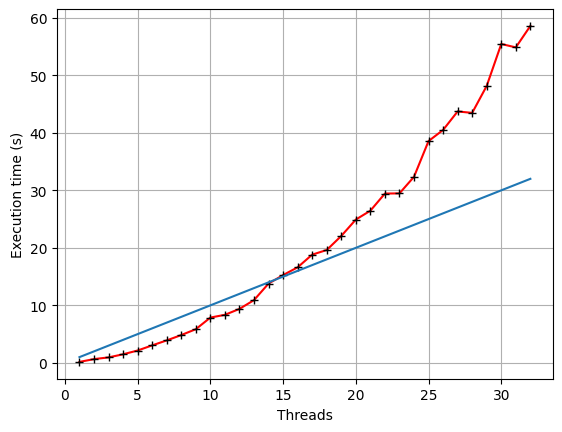

In [ ]:
data_file = BASE_DIR / "var_cells" / "weak_scaling_32threads_100000cells.csv"
out_file = BASE_DIR / "img" / "weakscaling_TE.png"

# Read CSV file into DataFrame
df = pd.read_csv(data_file)

# Assuming the CSV has columns named 'Threads' and 'ExecutionTime' (adjust accordingly)
xs = df['threads']
ys = df['execution_time_sec']

plt.plot(xs, ys, "r+", linestyle="-", markeredgecolor='k')
# plt.plot(xs, xs)
plt.grid()
plt.xlabel("Threads")
plt.ylabel("Execution time (s)")
plt.savefig(out_file, dpi=375)
plt.show()


0     1.000000
1     0.252185
2     0.174109
3     0.111084
4     0.077023
5     0.054442
6     0.042393
7     0.034252
8     0.028286
9     0.021030
10    0.019830
11    0.017650
12    0.015182
13    0.012016
14    0.010854
15    0.009970
16    0.008804
17    0.008442
18    0.007508
19    0.006649
20    0.006261
21    0.005627
22    0.005622
23    0.005121
24    0.004296
25    0.004091
26    0.003790
27    0.003811
28    0.003440
29    0.002988
30    0.003020
31    0.002828
Name: execution_time_sec, dtype: float64


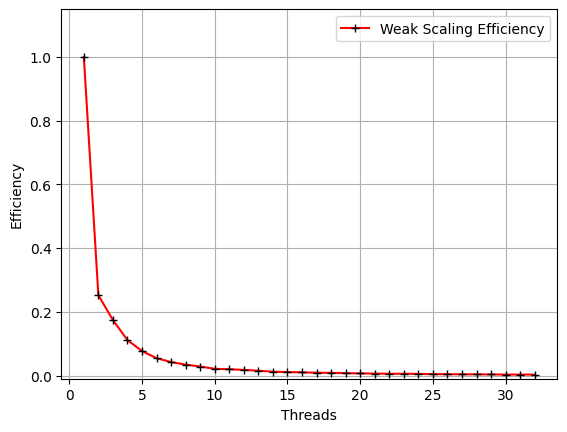

In [ ]:
# Efficiency = t1 / tN, where t1 is the 1-thread time, tN is current
t1 = df['execution_time_sec'].iloc[0]
efficiency = t1 / df['execution_time_sec']

plt.plot(threads, efficiency, "r-", marker='+',markeredgecolor='k' ,label="Weak Scaling Efficiency")
plt.ylabel("Efficiency")
plt.xlabel("Threads")

plt.ylim(-0.01,1.15)
plt.legend(loc="upper right")
plt.grid()
out_file = BASE_DIR / "img" / "weakscaling_Efficiency.png"
plt.savefig(out_file, dpi=375)
plt.show()
